# RIDGE REGRESSION (interpretation)

* Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

In [2]:
import graphlab

#### use the polynomial_sframe() function in quiz 3

In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >=1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            # assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
            
            
    return poly_sframe

Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

[INFO] 1452393064 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /usr/local/lib/python2.7/dist-packages/certifi/cacert.pem
1452393064 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to 527536646@qq.com and will expire on October 23, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-1324 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1452393064.log
[INFO] GraphLab Server Version: 1.7.1


In [5]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [6]:
sales = sales.sort('sqft_living')

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [124]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', 
                                            features = my_features, l2_penalty = 1e-5,
                                            validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.018657     | 2662555.738151     | 245656.462166 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [125]:
model15.get("coefficients")

name,index,value
(intercept),None,167924.857833
power_1,None,103.090949707
power_2,None,0.134604555207
power_3,None,-0.000129071368526
power_4,None,5.18928983318e-08
power_5,None,-7.77169387158e-12
power_6,None,1.71144993136e-16
power_7,None,4.51177845344e-20
power_8,None,-4.78840029112e-25
power_9,None,-2.33343424794e-28


name	index	value
(intercept)	None	73619.7521152
power_1	None	410.287462532
power_2	None	-0.230450714429
power_3	None	7.58840542472e-05
power_4	None	-5.65701802728e-09
power_5	None	-4.57028130557e-13
power_6	None	2.66360206673e-17
power_7	None	3.38584768925e-21
power_8	None	1.14723104144e-25
power_9	None	-4.65293584835e-30

***QUIZ QUESTION:  What's the learned value for the coefficient of feature `power_1`?***

# Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

In [9]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=1)
(set_1, set_2) = semi_split1.random_split(0.5, seed=1)
(set_3, set_4) = semi_split2.random_split(0.5, seed=1)

In [131]:
poly15_1_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features1 = poly15_1_data.column_names() # get the name of the features
poly15_1_data['price'] = set_1['price'] # add price to the data since it's the target
model15_1 = graphlab.linear_regression.create(poly15_1_data, target = 'price', features = my_features1, l2_penalty =  1e-5, validation_set = None,verbose = False)

In [132]:
poly15_2_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features2 = poly15_2_data.column_names() # get the name of the features
poly15_2_data['price'] = set_2['price'] # add price to the data since it's the target
model15_2 = graphlab.linear_regression.create(poly15_2_data, target = 'price', features = my_features2, l2_penalty =  1e-5, validation_set = None,verbose = False)

In [133]:
poly15_3_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features3 = poly15_3_data.column_names() # get the name of the features
poly15_3_data['price'] = set_3['price'] # add price to the data since it's the target
model15_3 = graphlab.linear_regression.create(poly15_3_data, target = 'price', features = my_features3, l2_penalty =  1e-5, validation_set = None,verbose = False)

In [134]:
poly15_4_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features4 = poly15_4_data.column_names() # get the name of the features
poly15_4_data['price'] = set_4['price'] # add price to the data since it's the target
model15_4 = graphlab.linear_regression.create(poly15_4_data, target = 'price', features = my_features4, l2_penalty =  1e-5, validation_set = None,verbose = False)

In [135]:
print model15_1.get("coefficients")
print model15_2.get("coefficients")
print model15_3.get("coefficients")
print model15_4.get("coefficients")

+-------------+-------+--------------------+
|     name    | index |       value        |
+-------------+-------+--------------------+
| (intercept) |  None |   192489.233712    |
|   power_1   |  None |   158.066614427    |
|   power_2   |  None |  -0.0839979820861  |
|   power_3   |  None | 8.26233280883e-05  |
|   power_4   |  None | -3.48314857559e-08 |
|   power_5   |  None | 7.49258597521e-12  |
|   power_6   |  None | -4.17451416174e-16 |
|   power_7   |  None | -5.59448372947e-20 |
|   power_8   |  None |  1.4322544368e-24  |
|   power_9   |  None | 5.01869149358e-28  |
+-------------+-------+--------------------+
[16 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-------------+-------+--------------------+
|     name    | index |       value        |
+-------------+-------+--------------------+
| (intercept) |  None |   -88974.6705018   |
|   power_1   |  None |   1010.83343443 

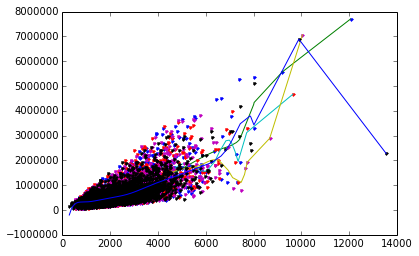

In [15]:
plt.plot(poly15_1_data['power_1'],poly15_1_data['price'],'.',
        poly15_1_data['power_1'], model15_1.predict(poly15_1_data),'-')
plt.plot(poly15_2_data['power_1'],poly15_2_data['price'],'.',
        poly15_2_data['power_1'], model15_2.predict(poly15_2_data),'-')
plt.plot(poly15_3_data['power_1'],poly15_3_data['price'],'.',
        poly15_3_data['power_1'], model15_3.predict(poly15_3_data),'-')
plt.plot(poly15_4_data['power_1'],poly15_4_data['price'],'.',
        poly15_4_data['power_1'], model15_4.predict(poly15_4_data),'-')

# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.) In GraphLab Create, adding an L2 penalty is a matter of adding an extra argument.

With the extra argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the extra parameter, the code should be the same as the experiment above. Also, make sure GraphLab Create doesn't create its own validation set by using the option `validation_set = None` in this call.

In [139]:
model15_1 = graphlab.linear_regression.create(poly15_1_data, target = 'price', features = my_features1, l2_penalty = 1e5, validation_set = None)
model15_2 = graphlab.linear_regression.create(poly15_2_data, target = 'price', features = my_features2, l2_penalty = 1e5, validation_set = None)
model15_3 = graphlab.linear_regression.create(poly15_3_data, target = 'price', features = my_features3, l2_penalty = 1e5, validation_set = None)
model15_4 = graphlab.linear_regression.create(poly15_4_data, target = 'price', features = my_features4, l2_penalty = 1e5, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5492
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.005227     | 4434478.195911     | 359313.312739 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5345
PRO

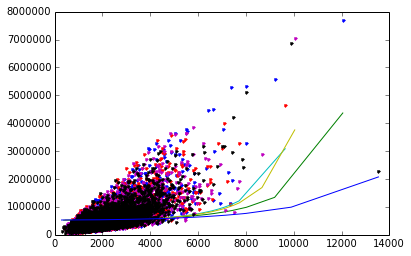

In [137]:
plt.plot(poly15_1_data['power_1'],poly15_1_data['price'],'.',
        poly15_1_data['power_1'], model15_1.predict(poly15_1_data),'-')
plt.plot(poly15_2_data['power_1'],poly15_2_data['price'],'.',
        poly15_2_data['power_1'], model15_2.predict(poly15_2_data),'-')
plt.plot(poly15_3_data['power_1'],poly15_3_data['price'],'.',
        poly15_3_data['power_1'], model15_3.predict(poly15_3_data),'-')
plt.plot(poly15_4_data['power_1'],poly15_4_data['price'],'.',
        poly15_4_data['power_1'], model15_4.predict(poly15_4_data),'-')

In [140]:
print model15_1.get("coefficients")
print model15_2.get("coefficients")
print model15_3.get("coefficients")
print model15_4.get("coefficients")

+-------------+-------+-------------------+
|     name    | index |       value       |
+-------------+-------+-------------------+
| (intercept) |  None |   521278.742171   |
|   power_1   |  None |    2.3984633291   |
|   power_2   |  None |  0.00135768212765 |
|   power_3   |  None |  2.6967900636e-07 |
|   power_4   |  None | 2.38382086455e-11 |
|   power_5   |  None | 1.59081080807e-15 |
|   power_6   |  None | 1.05518683499e-19 |
|   power_7   |  None | 7.38454366923e-24 |
|   power_8   |  None | 5.43676998874e-28 |
|   power_9   |  None | 4.15488098622e-32 |
+-------------+-------+-------------------+
[16 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-------------+-------+-------------------+
|     name    | index |       value       |
+-------------+-------+-------------------+
| (intercept) |  None |   516446.553207   |
|   power_1   |  None |   2.15791237195   |
|   power_2   

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves **fewer observations** available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

    Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
    Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
    ......
    Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
    

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve **10%** of the data as the test set and shuffle the remainder:

In [19]:
(train_valid, mtest) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=0)

In [20]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)


0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [21]:
train_valid_shuffled[0:10] # rows 0 to 9

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
2770601782,2014-08-01 00:00:00+00:00,453000.0,3.0,2.5,1510.0,1618,2.5,0
8581200350,2014-06-17 00:00:00+00:00,187500.0,3.0,1.5,1180.0,7000,1,0
7524200330,2015-03-16 00:00:00+00:00,290000.0,4.0,2.0,1630.0,7618,1.5,0
3331500121,2015-02-10 00:00:00+00:00,342888.0,2.0,1.0,790.0,5150,1,0
9297300045,2014-07-09 00:00:00+00:00,550000.0,3.0,2.0,1970.0,4166,2,0
0726059344,2015-04-21 00:00:00+00:00,475000.0,3.0,2.25,1580.0,8659,1,0
3336001515,2015-05-11 00:00:00+00:00,426250.0,4.0,1.0,1610.0,6000,1.5,0
7215720070,2014-08-06 00:00:00+00:00,1250000.0,5.0,5.0,5000.0,32909,2,0
3883100220,2015-01-20 00:00:00+00:00,299000.0,3.0,1.75,2010.0,8065,1,0
7214820610,2014-10-07 00:00:00+00:00,448000.0,4.0,1.75,2560.0,8270,1,0


In [22]:
validation4 = train_valid_shuffled[7758:9697]

To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $549,213.

In [23]:
print int(round(validation4['price'].mean(), 0))

530104


Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [24]:
first_4 = train_valid_shuffled[0:5818]
last_4 = train_valid_shuffled[7758:n]
train4 = first_4.append(last_4)

To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $539,008.

In [25]:
print int(round(train4['price'].mean(), 0))

539008


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error(RSS) using validation set just formed

In [28]:
def get_residual_sum_of_square(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residuals = predictions - outcome
    # Then square and add them up
    RSS = (residuals*residuals).sum()
    return(RSS) 

In [107]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    start = [0]*k
    end = [0]*k
    validation = [0]*k
    train = [0]*k
    model = [0]*k
    validation_error = [0]*k
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        
        validation[i] = data[start:end+1]
        if start ==0:
            train[i] = data[end+1:n]
        elif end+1 ==n:
            train[i] = data[0:start]
        else:
            train[i] = data[end+1:n]
            train[i].append(data[end+1:n])
            
        model[i] = graphlab.linear_regression.create(train[i], target = output_name, 
                                              features = features_list, 
                                                     l2_penalty = l2_penalty, 
                                              validation_set=None)
        validation_error[i] = get_residual_sum_of_square(model[i], validation[i], validation[i]['price'])
    return sum(validation_error)
    

        

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [30]:
def polynomial_sframe(feature, degree):
    # assume that degree >=1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            # assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
            
            
    return poly_sframe

In [66]:
poly15_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
features_list = poly15_data.column_names()
poly15_data['price'] = train_valid_shuffled['price']
poly15_data.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
1510.0,2280100.0,3442951000.0,5.19885601e+12,7.8502725751e+15,1.18539115884e+19,1.78994064985e+22
1180.0,1392400.0,1643032000.0,1.93877776e+12,2.2877577568e+15,2.69955415302e+18,3.18547390057e+21
1630.0,2656900.0,4330747000.0,7.05911761e+12,1.15063617043e+16,1.8755369578e+19,3.05712524122e+22
790.0,624100.0,493039000.0,3.8950081e+11,3.077056399e+14,2.43087455521e+17,1.92039089862e+20
1970.0,3880900.0,7645373000.0,1.506138481e+13,2.96709280757e+16,5.84517283091e+19,1.15149904769e+23
1580.0,2496400.0,3944312000.0,6.23201296e+12,9.8465804768e+15,1.55575971533e+19,2.45810035023e+22
1610.0,2592100.0,4173281000.0,6.71898241e+12,1.08175616801e+16,1.7416274305e+19,2.8040201631e+22
5000.0,25000000.0,1.25e+11,6.25e+14,3.125e+18,1.5625e+22,7.8125e+25
2010.0,4040100.0,8120601000.0,1.632240801e+13,3.28080401001e+16,6.59441606012e+19,1.32547762808e+23
2560.0,6553600.0,16777216000.0,4.294967296e+13,1.09951162778e+17,2.81474976711e+20,7.20575940379e+23


In [141]:
import numpy as np

l2_penalty = np.logspace(1, 7, num=13)
print l2_penalty


[  1.00000000e+01   3.16227766e+01   1.00000000e+02   3.16227766e+02
   1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07]


In [108]:
Rss = [0]*len(l2_penalty)
for i in range(len(l2_penalty)):
    Rss[i] = k_fold_cross_validation(10, l2_penalty[i], poly15_data, 'price', features_list)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17457
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.016304     | 2327196.923856     | 247955.926972 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 15517
P

In [112]:
for i in range(0,10):
    if i == 0:
        Min = Rss[i]
        a = 0
    elif Rss[i] < Min:
        Min = Rss[i]
        a = i
print a, Min, l2_penalty[a]

3 1.29263045424e+15 316.227766017


***QUIZ QUESTIONS:  What is the best value for the L2 penalty according to 10-fold validation?***

You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.  

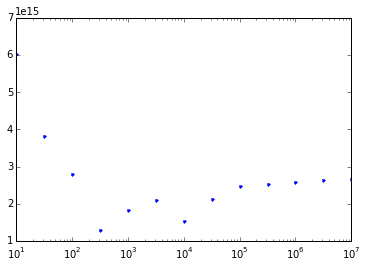

In [115]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
plt.xscale('log')
plt.plot(l2_penalty, Rss,'.')


Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`.  This way, your final model will be trained on the entire dataset.

In [117]:
def polynomial_lasso_regression(l2_penalty, data, output, features_list):
    model = graphlab.linear_regression.create(data, features = features_list,
                                             target = output, l2_penalty = l2_penalty,                                             
                                             validation_set=None, verbose=False)
                                            
    return model

In [118]:
final_model = polynomial_lasso_regression(l2_penalty[3], poly15_data, 'price', features_list)


In [119]:
test15_data = polynomial_sframe(mtest['sqft_living'], 15)
features_list = test15_data.column_names()
test15_data['price'] = mtest['price']
rss = get_residual_sum_of_square(final_model, test15_data, test15_data['price'])
print rss


1.29567161348e+14
